# Comparison Pileup vs. No Pileup Spectra

In [1]:
from gpxray.chandra.io import read_spectrum_chart
import matplotlib.pyplot as plt
from pathlib import Path
from gammapy.maps import RegionNDMap
from astropy.io import fits
from astropy.table import Table

In [2]:
BLURS = [0.07, 0.115, 0.16, 0.205, 0.25]
BLUR = BLURS[2]

In [3]:
PATH = Path(f"../psf-marx-no-pileup/19692/spectrum/pks-0637-marx-no-pileup-blur-{BLUR}")
PATH_PILEUP = Path(f"../psf-marx-pileup/19692/spectrum/pks-0637-marx-pileup-blur-{BLUR}")

In [4]:
spec_ref = read_spectrum_chart("../misc/source_flux_chart.dat")
spec_ref_piled_up = read_spectrum_chart("../misc/source_flux_chartv2.dat")

In [5]:
filename = PATH / f"source-flux-chart-pks-0637-marx-no-pileup-blur-{BLUR}.dat"

spec = read_spectrum_chart(filename)

filename = PATH_PILEUP / f"source-flux-chart-pks-0637-marx-pileup-blur-{BLUR}.dat"

spec_piled_up = read_spectrum_chart(filename)

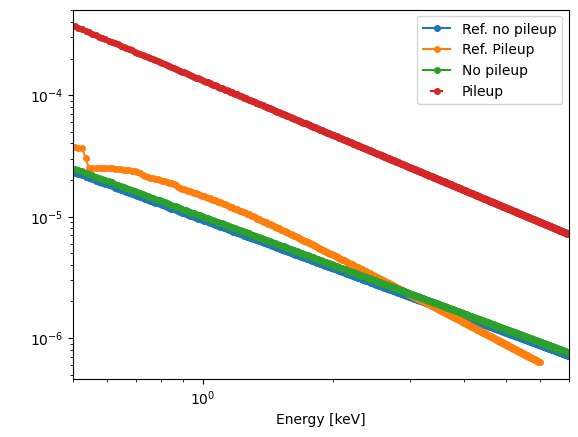

In [6]:
spec_ref.plot(ls="-", label="Ref. no pileup")
spec_ref_piled_up.plot(ls="-", label="Ref. Pileup")
spec.plot(ls="-", label="No pileup");
spec_piled_up.plot(label="Pileup");
plt.legend();

In [7]:
filename_model = PATH / f"spectral-fit-model-pks-0637-marx-no-pileup-blur-{BLUR}.yaml"

with filename_model.open("r") as f:
    print(f.read())

name: (xsphabs.absorption * powlaw1d.pwl)
type: binaryopmodel
operator: '*'
lhs:
    name: xsphabs.absorption
    type: xsphabs
    parameters:
    -   name: nH
        value: 3.1403918689282047e-09
        min: 0.0
        max: 1000000.0
        frozen: false
        unit: 10^22 atoms / cm^2
rhs:
    name: powlaw1d.pwl
    type: powlaw1d
    parameters:
    -   name: gamma
        value: 1.327024351141532
        min: -10.0
        max: 10.0
        frozen: false
        unit: ''
    -   name: ref
        value: 1.0
        min: -3.4028234663852886e+38
        max: 3.4028234663852886e+38
        frozen: true
        unit: ''
    -   name: ampl
        value: 0.0010017064092351698
        min: 9.472939455394682e-07
        max: 0.9472939455394682
        frozen: false
        unit: ''



In [8]:
filename_model = PATH_PILEUP / f"spectral-fit-model-pks-0637-marx-pileup-blur-{BLUR}.yaml"

with filename_model.open("r") as f:
    print(f.read())

name: (xsphabs.absorption * powlaw1d.pwl)
type: binaryopmodel
operator: '*'
lhs:
    name: xsphabs.absorption
    type: xsphabs
    parameters:
    -   name: nH
        value: 4.1612454679902e-07
        min: 0.0
        max: 1000000.0
        frozen: false
        unit: 10^22 atoms / cm^2
rhs:
    name: powlaw1d.pwl
    type: powlaw1d
    parameters:
    -   name: gamma
        value: 1.4986699538964743
        min: -10.0
        max: 10.0
        frozen: false
        unit: ''
    -   name: ref
        value: 1.0
        min: -3.4028234663852886e+38
        max: 3.4028234663852886e+38
        frozen: true
        unit: ''
    -   name: ampl
        value: 0.013242804818472306
        min: 9.472939455394682e-07
        max: 0.9472939455394682
        frozen: false
        unit: ''

